In [1]:
#Problem Definition.
#It is a sports case study where data for 2014 to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.

In [2]:
#Importing important librarires

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Data collection and analysis

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [6]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [8]:
df.shape

(30, 17)

In [9]:
# In this dataset we have 30rows and 17 columns

In [10]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [11]:
# now we have to check null values for the dataset

In [12]:
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [13]:
# observation  now from above function we can see that there is no null values in our dataset

In [14]:
#No need to change the datatype they are appropriate so we can skip the step of data conversion .

In [15]:
# Now we can directly do visulization

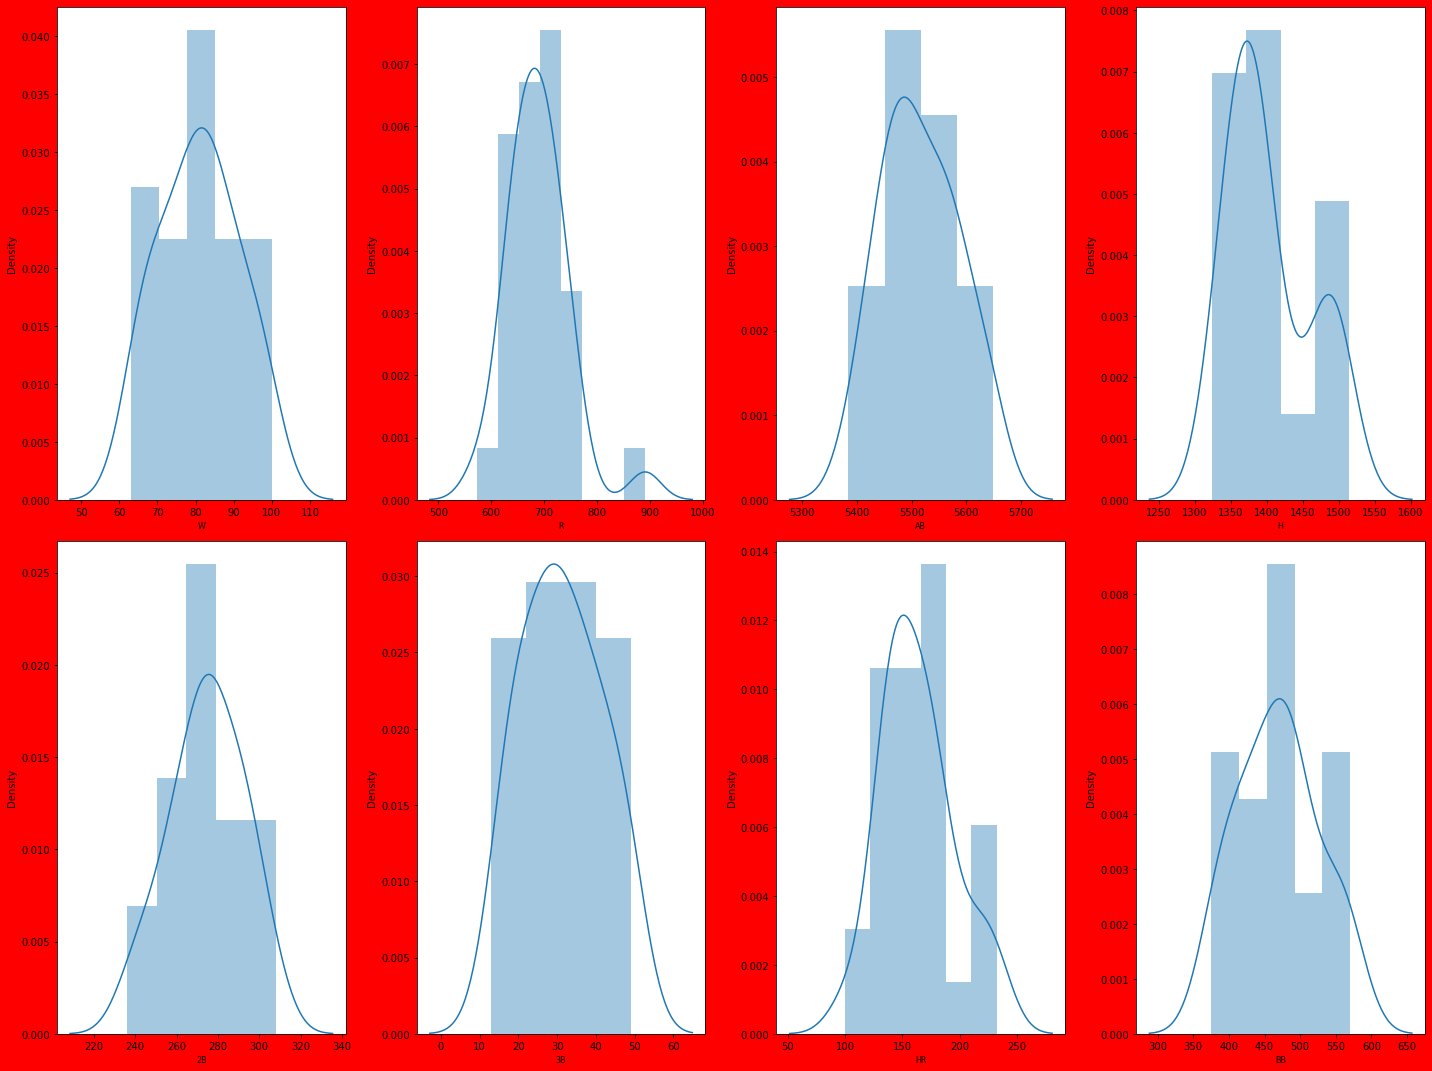

In [28]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1

for column in df:
    if plotnumber <=8:
     ax = plt.subplot(2,4,plotnumber)
     sns.distplot(df[column])
     plt.xlabel(column,fontsize=8)
    
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

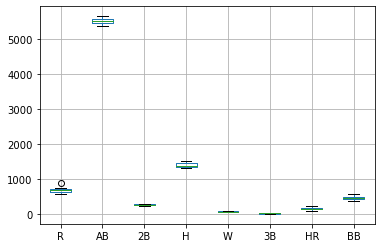

In [29]:
plt.figure()
df.boxplot(['R','AB','2B','H','W','3B','HR','BB'])

In [30]:
# observations-
# 1.Run and win are linearly correlated. And outliers are present between 850 and 900
# 2.At balls is very weekly related to Wins With no outliers.
# 3.Hits are also very weekly related to winning with no outliers
# 4.Doubles are linearly related with Wins, with no outlier, and data is left-skewed
# 5.Triple has very weak negative correlations with win with no outlier and data is right-skewed
# 6.The home run has a very low correlation with wins with no lot of outliers and data is right-skewed
# 7.Walk is lightly correlated to win with no outlier
# 8.Strikeout is not correlated to win with no outlier and the dataset is left-skewed.
# 9. Runs Allowed is highly correlated to win with no outliers
# 10.Earned Runs is highly correlated to win with no outliers


 

[]

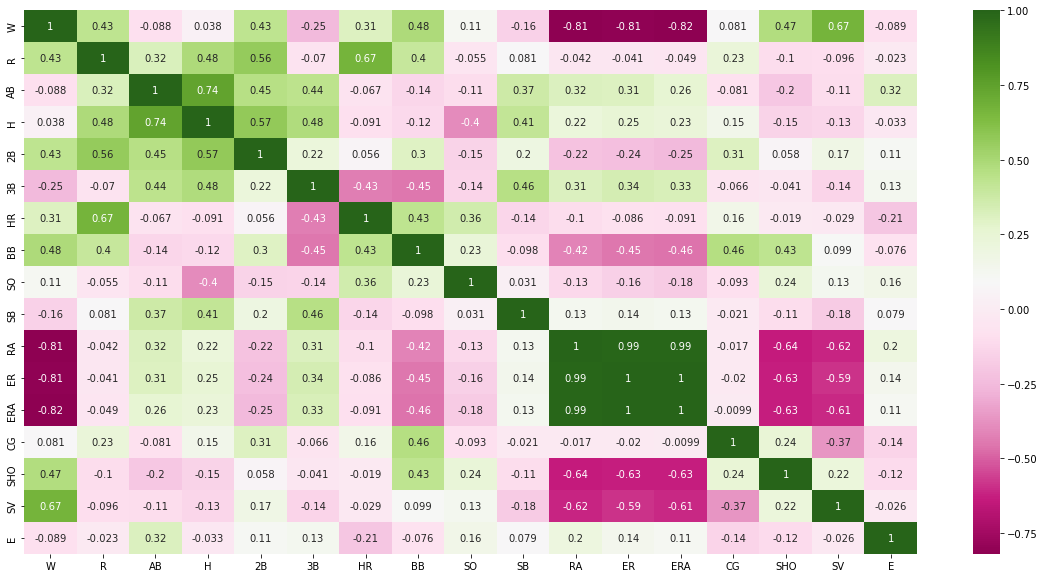

In [31]:
plt.figure(figsize = (20,10))
df= df.corr()
sns.heatmap(df, annot = True,cmap='PiYG')
plt.plot()

In [34]:
#Storytelling:

#The number of runs, home runs, doubles, Saves, Shutouts, and Walks are highly positively linearly correlated.

#Stolen Bases, Runs Allowed, Earned Runs are highly negative linearly correlated.

#The remaining features have less to no linear correlation with no of Wins

#The dataset set has too much randomness. And only has sets of data (too little to form a suitable Decision tree)

In [35]:
# create x=feature and y= label


In [43]:
y=df['W']
x=df.drop(columns=['W'])

In [44]:
y

W      1.000000
R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
Name: W, dtype: float64

In [45]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [46]:
# visulalizing the relationships

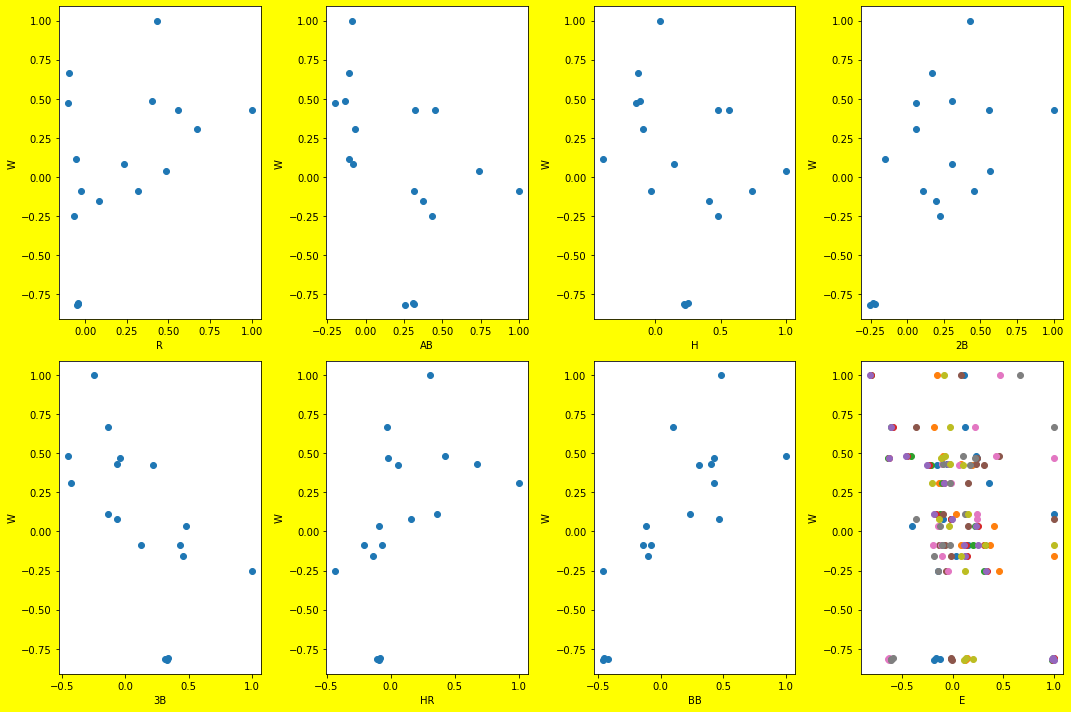

In [48]:
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1

for column in x:
    if plotnumber <=8:
     ax = plt.subplot(2,4,plotnumber)
    plt.scatter(x[column],y)
    plt.xlabel(column,fontsize=10)
    plt.ylabel('W',fontsize=10)
    
    plotnumber+=1
plt.tight_layout()

In [66]:
y=df['W']
x=df.drop(columns=['W'])

In [70]:
 from sklearn.preprocessing import StandardScaler
 
    

In [73]:
# data scaling

scaler = StandardScaler()

x_scaled=scaler.fit_transform(x)

In [74]:
x_scaled

array([[ 0.66673457, -0.94005665, -0.5020893 ,  0.67278703, -1.02792419,
         0.60226064,  0.95481776,  0.20680385, -1.02363536, -1.6462433 ,
        -1.63133319, -1.62426759, -0.0891111 ,  1.14403308,  1.71495344,
        -0.67803793],
       [ 2.44795359,  0.30456705,  0.75713458,  1.08091253, -0.53166183,
         1.66361824,  0.75371464, -0.34433639, -0.19346518, -0.20628352,
        -0.20197507, -0.19397943,  0.42867406, -0.25565465, -0.14797941,
        -0.42720338],
       [ 0.31851169,  2.38357815,  1.48190052,  0.75168354,  0.85393956,
        -0.48976491, -0.56962376, -0.5140554 ,  0.81988859,  0.4613667 ,
         0.45099633,  0.37201722, -0.64073459, -0.48455604, -0.17236586,
         0.86064559],
       [ 0.82977514,  1.58660731,  2.21970673,  1.10177647,  0.97255073,
        -0.55939501, -0.52509268, -1.48285526,  0.96193495,  0.29020182,
         0.34457086,  0.32675228,  0.14130512, -0.35857239, -0.23098161,
        -0.46474533],
       [ 1.07142715,  0.71364422,  0

In [75]:
# Train Test split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=49)

In [77]:
y_train.head()

R      0.430751
ER    -0.809435
ERA   -0.819600
SB    -0.157234
SV     0.666530
Name: W, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# model instanting and training

In [82]:
from sklearn.linear_model import LinearRegression

In [84]:
regression=LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [85]:
# To predict the chance of wins with given features

In [86]:
df.tail(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
SV,0.666530,-0.096380,-0.106367,-0.130371,0.171576,-0.142370,-0.028540,0.099445,0.126297,-0.183418,-0.616224,-0.589663,-0.607005,-0.367766,0.221639,1.000000,-0.025636
E,-0.089485,-0.023262,0.316743,-0.033173,0.105754,0.126678,-0.207597,-0.075685,0.155133,0.079149,0.198996,0.136921,0.113137,-0.140047,-0.115716,-0.025636,1.000000


In [87]:
#since we have already fit the scaler , we can transform the data

In [93]:
# AdjustedR2score

In [94]:
regression.score(x_train,y_train)

1.0

In [95]:
# Lets check how well model fitsthe test data

In [96]:
regression.score(x_test,y_test)

0.9470210897376723

In [97]:
# lets plot and visualize

In [98]:
y_pred=regression.predict(x_test)

In [99]:
y_pred

array([0.55004566, 0.6163696 , 0.01741478, 0.93254587, 0.01427146])

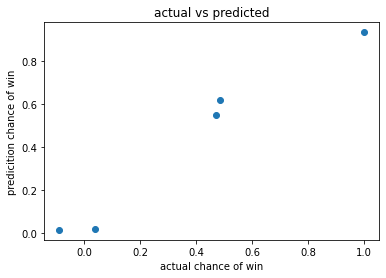

In [100]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual chance of win')
plt.ylabel('predicition chance of win')
plt.title('actual vs predicted')
plt.show()

In [101]:
# Model Evaluation

In [102]:
from sklearn.metrics import mean_squared_error

In [103]:
y_pred=regression.predict(x_test)

In [104]:
y_pred

array([0.55004566, 0.6163696 , 0.01741478, 0.93254587, 0.01427146])

In [111]:
mean_squared_error(y_test,y_pred)

0.00785525474749047

In [112]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.08862987502806528